In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# <font color=red> QUESTION. </font>
> ## <font color=red> I tried to read a data in table form using pd.read_table( ) and ended up with the following output. How can I make it into proper format?</font>

In [2]:
movie_df = pd.read_table('u.user')
movie_df

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101
...,...
937,939|26|F|student|33319
938,940|32|M|administrator|02215
939,941|20|M|student|97229
940,942|48|F|librarian|78209


#### First, let's look at the issues.
- The data is seperated by pipe symbol "|".
- The first row is taken as column header
- There is no name for each column.

#### Issue 1
- data seperated by "|"


In [3]:
movie_df = pd.read_table('u.user', sep ="|")
movie_df

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


#### Issue 2
- The first row is taken as column header

In [4]:
movie_df = pd.read_table('u.user', sep ="|", header =None)
movie_df

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### Issue 3
- No name for each column

In [5]:
col_names =['User_id', 'Age','Gender','Occupation','pincode']
movie_df = pd.read_table('u.user', sep ="|", header =None, names = col_names)
movie_df

,User_id,Age,Gender,Occupation,pincode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# <font color=red> QUESTION</font> 
> ## <font color=red> I find missing values in the dataset given. What are the ways in which I can drop it row-wise?</font>

In [6]:
sightings_df = pd.read_csv('ufo.csv')
sightings_df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [7]:
sightings_df.isnull() 
#converts all missing values (NaN) to Boolean True and all values to Boolean False

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False


In [8]:
sightings_df.notnull()
#converts all values into True and all missing values (NaN) to False

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True
...,...,...,...,...,...
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True


In [9]:
sightings_df.isnull().sum()
# .sum() converts True to 1 and False to zero across rows by default (or through each column) and adds all 1's.


City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

#### Columns State and Time doesn't have any NaN

In [10]:
sightings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [11]:
sightings_df.shape

#original number of rows and columns

(18241, 5)

### DROPPING ROWS HAVING NaN

In [12]:
sightings_df.dropna(how='any').shape

#this code looks through each row, and if ANY entry is missing (NaN), it drops the row.
# .shape gives the total number of rows and columns after the code has completed the execution on the dataset.

(2486, 5)

In [13]:
sightings_df.dropna(how='all').shape

#this code looks through each row, and if ALL entry is missing (NaN), it drops the row.
# .shape gives the total number of rows and columns after the code has completed the execution on the dataset.
# No rows are dropped since we know that columns State and Time doesn't have any NaN.

(18241, 5)

#### No rows are dropped since we know that columns State and Time doesn't have any NaN.

In [14]:
sightings_df.dropna(subset =['City']).shape

#this code looks through 'City' column of each row, and if any entry is missing (NaN), it drops the row.
# .shape gives the total number of rows and columns after the code has completed the execution on the dataset.

(18216, 5)

In [15]:
sightings_df.dropna(subset =['City','Colors Reported'], how ='any').shape

#this code looks through columns specified in the subset, and if any entry is missing (NaN) in ANY of these columns, for a particular row, it drops that row.
# .shape gives the total number of rows and columns after the code has completed the execution on the dataset.

(2877, 5)

In [16]:
sightings_df.dropna(subset=['City','Colors Reported'], how='all').shape

#this code looks through columns specified in the subset, and if ALL the entries are missing (NaN) in these columns, for a particular row, it drops that row.
# .shape gives the total number of rows and columns after the code has completed the execution on the dataset.

(18221, 5)

# <font color=red> QUESTION. 
> ## <font color=red> I have two datasets I wish to combine into one. How can I do that using pd.merge( )? </font>

In [17]:
col_names1 =['movie_id','movie_name']
movie_df1 = pd.read_table('u.item', sep ="|", header =None, usecols=[0,1], names=col_names1)
col_names2 =['user_id', 'movie_id', 'ratings', 'timestamp']
movie_df2 = pd.read_table('u.data', header =None, names = col_names2)


In [18]:
movie_df1

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [19]:
movie_df2

,user_id,movie_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [20]:
movie_df1.movie_id.nunique()
#gives the number of unique values in movie_id column of dataframe movie_df1

1682

In [21]:
movie_df2.movie_id.nunique()
#gives the number of unique values in movie_id column of dataframe movie_df2

1682


#### <font color=green> How come? possible reason is repetition of movie_id. Hence we need to check it.</font> 

In [22]:
movie_df2.loc[movie_df2.movie_id ==1,:]
# used .loc method to loacte within movie_df2, rows which satisfy the condition : value of movie_id =1, while including all columns

,user_id,movie_id,ratings,timestamp
24,308,1,4,887736532
454,287,1,5,875334088
957,148,1,4,877019411
971,280,1,4,891700426
1324,66,1,3,883601324
...,...,...,...,...
99423,895,1,4,879437950
99445,747,1,5,888639138
99631,786,1,4,882841828
99704,800,1,4,887646283


In [23]:
movie_df2.loc[movie_df2.movie_id ==2, :]
# used .loc method to loacte within movie_df2, rows which satisfy the condition : value of movie_id =2, while including all columns

,user_id,movie_id,ratings,timestamp
172,5,2,3,875636053
264,268,2,2,875744173
352,276,2,4,874792436
742,217,2,3,889069782
1920,87,2,4,879876074
...,...,...,...,...
97687,798,2,4,875743787
98109,49,2,1,888069606
98194,807,2,4,892978338
99795,886,2,4,876033368


# <font color=blue> INFERENCE.</font> 

>  <font color=blue> There are 452 ratings for movie_id =1 hence there are 452 rows for that movie_id and there are 131 ratings for movie_id =2 and hence 131 rows for that movie_id. This would be the cases for other movie_id too.</font>

In [24]:
movie_ratings =pd.merge(movie_df1,movie_df2)
movie_ratings
# In pd.merge, the function  arrange column in such a way that, the first dataframe order of column is maitained, followed by the second dataframe order of columns, while skipping the common column when it comes to second dataframe.
# Then the function looks at the common column or key, (here movie_id), then looks at the first value of the entry in that column in the first dataframe, then searches for all rows in second dataframe with that movie_id.
# If there is a repetition of movie_id in any of the dataframe, it is taken in the order of index of that dataframe.

,movie_id,movie_name,user_id,ratings,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722



### <font color=blue> HOW DOES THE FUNCTION WORK?</font>

> <font color=blue> In pd.merge, the function  arrange column in such a way that, the first dataframe order of column is maitained, followed by the second dataframe order of columns, while skipping the common column when it comes to second dataframe.Then the function looks at the common column or key, (here movie_id), then looks at the first value of the entry in that column in the first dataframe, then searches for all rows in second dataframe with that movie_id.If there is a repetition of movie_id in any of the dataframe, it is taken in the order of index of that dataframe.</font>

In [25]:
movie_ratings =pd.merge(movie_df2,movie_df1)
movie_ratings

,user_id,movie_id,ratings,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."



Here you can see that the order of dataframe 1 is maintained, and also of dataframe two except the common cloumn. But the important point is that, since we took movie_df2 as the first dataframe which has the first entry in common column movie_id as 242, all rows having that movie_id is enlisted in the order of index of movie_df2. 

# <font color=blue>INFERENCE.</font> 
>  <font color=blue> It is best to select as dataframe1 in pd.merge(), the one in which the common column is properly sorted.</font>

# <font color=red > QUESTION. 
> ## <font color=red > I wish to use pd.merge() but the common column has different column headers. How can I merge them?</font>

In [26]:
col_names3 =['m_id','movie_name']
movie_df3 = pd.read_table('u.item', sep ="|", header =None, usecols=[0,1], names=col_names3,)
col_names4 =['user_id', 'movie_id', 'ratings', 'timestamp']
movie_df4 = pd.read_table('u.data', header =None, names = col_names4)

In [27]:
movie_df3

,m_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [28]:
movie_ratings2 = pd.merge(movie_df3,movie_df4,left_on ='m_id',right_on ="movie_id")
movie_ratings2

,m_id,movie_name,user_id,movie_id,ratings,timestamp
0,1,Toy Story (1995),308,1,4,887736532
1,1,Toy Story (1995),287,1,5,875334088
2,1,Toy Story (1995),148,1,4,877019411
3,1,Toy Story (1995),280,1,4,891700426
4,1,Toy Story (1995),66,1,3,883601324
...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1678,1,889289570
99996,1679,B. Monkey (1998),863,1679,3,889289491
99997,1680,Sliding Doors (1998),863,1680,2,889289570
99998,1681,You So Crazy (1994),896,1681,3,887160722


In [29]:
movie_ratings2 = pd.merge(movie_df3,movie_df4,left_on ='m_id',right_on ="movie_id")
#merged using pd.merge
movie_ratings2 = pd.merge(movie_df3,movie_df4,left_on ='m_id',right_on ="movie_id").drop(columns ="m_id")
#dropped m_id column since it is same as movie_id column
movie_ratings2 = pd.merge(movie_df3,movie_df4,left_on ='m_id',right_on ="movie_id").drop(columns ="m_id").set_index("movie_id").reset_index()
# wanted to bring the movie_id column as first one, so set it as index, then reset the index
movie_ratings2

,movie_id,movie_name,user_id,ratings,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1,889289570
99996,1679,B. Monkey (1998),863,3,889289491
99997,1680,Sliding Doors (1998),863,2,889289570
99998,1681,You So Crazy (1994),896,3,887160722


# <font color=red > QUESTION. </font> 
> ## <font color=red > How can we use pd.merge( ) if the common column is the index in that dataset? </font>

 #### <font color=blue> There are three possibilities.</font>
- #### The first dataset alone can have the common column as index
- #### The second dataset alone can have the common column as index
- #### Both has the common column as index

### <font color=green > FIRST DATASET IN PD.MERGE() HAS THE COMMON COLUMN AS INDEX. </font>

In [30]:
col_names5 =['m_id','movie_name']
movie_df5 = pd.read_table('u.item', sep ="|", header =None, usecols=[0,1], names=col_names5,index_col='m_id')
col_names6 =['user_id', 'movie_id', 'ratings', 'timestamp']
movie_df6 = pd.read_table('u.data', header =None, names = col_names6)

In [31]:
movie_df5

,movie_name
m_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [32]:
movie_df6

,user_id,movie_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [33]:
movie_rating31 = pd.merge(movie_df5,movie_df6, left_index=True, right_on='movie_id')
movie_rating31

,movie_name,user_id,movie_id,ratings,timestamp
24,Toy Story (1995),308,1,4,887736532
454,Toy Story (1995),287,1,5,875334088
957,Toy Story (1995),148,1,4,877019411
971,Toy Story (1995),280,1,4,891700426
1324,Toy Story (1995),66,1,3,883601324
...,...,...,...,...,...
75323,Mat' i syn (1997),863,1678,1,889289570
67302,B. Monkey (1998),863,1679,3,889289491
80394,Sliding Doors (1998),863,1680,2,889289570
92329,You So Crazy (1994),896,1681,3,887160722


In [34]:
movie_rating32 = pd.merge(movie_df5,movie_df6, left_on='m_id', right_on='movie_id')
movie_rating32

,movie_name,user_id,movie_id,ratings,timestamp
0,Toy Story (1995),308,1,4,887736532
1,Toy Story (1995),287,1,5,875334088
2,Toy Story (1995),148,1,4,877019411
3,Toy Story (1995),280,1,4,891700426
4,Toy Story (1995),66,1,3,883601324
...,...,...,...,...,...
99995,Mat' i syn (1997),863,1678,1,889289570
99996,B. Monkey (1998),863,1679,3,889289491
99997,Sliding Doors (1998),863,1680,2,889289570
99998,You So Crazy (1994),896,1681,3,887160722


### <font color=green > SECOND DATASET IN PD.MERGE() HAS THE COMMON COLUMN AS INDEX. </font>

In [35]:
col_names7 =['m_id','movie_name']
movie_df7 = pd.read_table('u.item', sep ="|", header =None, usecols=[0,1], names=col_names7)
col_names8 =['user_id', 'movie_id', 'ratings', 'timestamp']
movie_df8 = pd.read_table('u.data', header =None, names = col_names8, index_col='movie_id')

In [36]:
movie_df7

,m_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [37]:
movie_df8

,user_id,ratings,timestamp
movie_id,,,
242,196,3,881250949
302,186,3,891717742
377,22,1,878887116
51,244,2,880606923
346,166,1,886397596
...,...,...,...
476,880,3,880175444
204,716,5,879795543
1090,276,1,874795795


In [38]:
movie_rating41 =pd.merge(movie_df3,movie_df2, left_on='m_id', right_on='movie_id')
movie_rating41

,m_id,movie_name,user_id,movie_id,ratings,timestamp
0,1,Toy Story (1995),308,1,4,887736532
1,1,Toy Story (1995),287,1,5,875334088
2,1,Toy Story (1995),148,1,4,877019411
3,1,Toy Story (1995),280,1,4,891700426
4,1,Toy Story (1995),66,1,3,883601324
...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1678,1,889289570
99996,1679,B. Monkey (1998),863,1679,3,889289491
99997,1680,Sliding Doors (1998),863,1680,2,889289570
99998,1681,You So Crazy (1994),896,1681,3,887160722


In [39]:
movie_rating42 =pd.merge(movie_df3,movie_df2, left_on='m_id', right_index=True)
movie_rating42
#don't go for this.

,m_id,movie_name,user_id,movie_id,ratings,timestamp
0,1,Toy Story (1995),186,302,3,891717742
1,2,GoldenEye (1995),22,377,1,878887116
2,3,Four Rooms (1995),244,51,2,880606923
3,4,Get Shorty (1995),166,346,1,886397596
4,5,Copycat (1995),298,474,4,884182806
...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),99,50,5,885679998
1678,1679,B. Monkey (1998),306,14,5,876503995
1679,1680,Sliding Doors (1998),92,709,2,875654590
1680,1681,You So Crazy (1994),227,295,5,879035387


### <font color=green > BOTH DATASET IN PD.MERGE() HAS THE COMMON COLUMN AS INDEX. </font>

In [40]:
col_names9 =['m_id','movie_name']
movie_df9 = pd.read_table('u.item', sep ="|", header =None, usecols=[0,1], names=col_names9,index_col='m_id')
col_names10 =['user_id', 'movie_id', 'ratings', 'timestamp']
movie_df10 = pd.read_table('u.data', header =None, names = col_names10, index_col='movie_id')

In [41]:
movie_df9

,movie_name
m_id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [42]:
movie_df10

,user_id,ratings,timestamp
movie_id,,,
242,196,3,881250949
302,186,3,891717742
377,22,1,878887116
51,244,2,880606923
346,166,1,886397596
...,...,...,...
476,880,3,880175444
204,716,5,879795543
1090,276,1,874795795


In [43]:
pd.merge(movie_df9,movie_df10, left_on ='m_id', right_index=True)
#use this if you want to keep column header of first dataset as index header

,movie_name,user_id,ratings,timestamp
m_id,,,,
1,Toy Story (1995),308,4,887736532
1,Toy Story (1995),287,5,875334088
1,Toy Story (1995),148,4,877019411
1,Toy Story (1995),280,4,891700426
1,Toy Story (1995),66,3,883601324
...,...,...,...,...
1678,Mat' i syn (1997),863,1,889289570
1679,B. Monkey (1998),863,3,889289491
1680,Sliding Doors (1998),863,2,889289570


In [44]:
pd.merge(movie_df9,movie_df10, left_index=True, right_on ='movie_id')
#use this if you want to keep column header of second dataset as index header

,movie_name,user_id,ratings,timestamp
movie_id,,,,
1,Toy Story (1995),308,4,887736532
1,Toy Story (1995),287,5,875334088
1,Toy Story (1995),148,4,877019411
1,Toy Story (1995),280,4,891700426
1,Toy Story (1995),66,3,883601324
...,...,...,...,...
1678,Mat' i syn (1997),863,1,889289570
1679,B. Monkey (1998),863,3,889289491
1680,Sliding Doors (1998),863,2,889289570


In [45]:
pd.merge(movie_df9,movie_df10, left_index=True, right_index =True)
#This produces just the index by losing both column header names

,movie_name,user_id,ratings,timestamp
1,Toy Story (1995),308,4,887736532
1,Toy Story (1995),287,5,875334088
1,Toy Story (1995),148,4,877019411
1,Toy Story (1995),280,4,891700426
1,Toy Story (1995),66,3,883601324
...,...,...,...,...
1678,Mat' i syn (1997),863,1,889289570
1679,B. Monkey (1998),863,3,889289491
1680,Sliding Doors (1998),863,2,889289570
1681,You So Crazy (1994),896,3,887160722


# <font color=blue>INFERENCE.</font> 
> -  <font color=blue> If either one of the dataset has the common column as index, then go for left_on and right_on, </font>
> -  <font color=blue> If both dataset has the common column as index, then go for left_on or right_on, depending on the dataset whose column header you wish to keep, given both of them have different names, and for the other one give right_index=True or left_index =True , respectively </font>

# <font color=red > QUESTION. </font> 
> ## <font color=red > How can we use pd.merge( ) if the common column is the index in that dataset? </font>

In [46]:
avocado_df = pd.read_csv("avocado.csv")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [47]:
albany_df = avocado_df[avocado_df['region'] == 'Albany']
albany_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


### The index is kind of useless. Hnece we replace it with the date and drop the unnamed column


In [48]:
albany_df=albany_df.iloc[:,1:] #dropped the first column
albany_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


In [49]:
albany_df.set_index("Date", inplace=True) #set the date as index
albany_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany


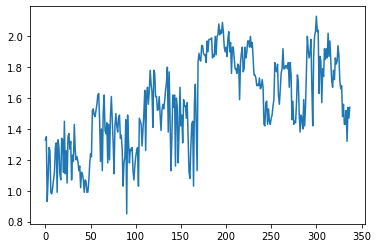

In [58]:
albany_df.reset_index().AveragePrice.plot()
#we can see here that setting usual index produces a plot which doesn't provide any meaningful insight as we cannot relate to the x-axis variable.


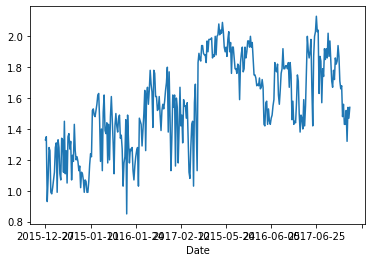

In [59]:
albany_df.AveragePrice.plot() #plotting the average price over the index which is date. This is why we set the date as index.